# Density-based clustering

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [151]:
# read customer dataframe
df = pd.read_csv('customer_dataframe.csv', sep='\t', index_col=0)
df.head()

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder
CustomerID,,,,,,,,,,,,,,
17850,1702,21,141,12,48.628571,5317.89,6.36,107.25,151.939714,31,3.960370,34,4.137478,3.186426
13047,1355,105,309,3,84.687500,3089.10,6.64,68.00,193.068750,35,3.926082,9,5.420969,3.875000
12583,4978,114,714,100,292.823529,6629.34,6.80,132.80,389.961176,50,2.140474,15,5.803909,4.087463
13748,439,24,208,8,87.800000,948.25,9.36,204.00,189.650000,0,3.996429,5,4.080050,2.321928
15100,58,1,32,16,9.666667,635.10,175.20,350.40,105.850000,22,10.950000,3,2.251629,2.251629


In [152]:
df.describe()

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder
count,4333.000000,4333.000000,4333.000000,4333.000000,4333.000000,4.333000e+03,4333.000000,4333.000000,4.333000e+03,4333.000000,4333.000000,4333.000000,4333.000000,4333.000000
mean,1129.535657,61.446573,366.792523,142.284099,201.104617,1.913629e+03,14.190829,122.451858,3.278829e+02,21.331641,3.492818,4.247173,4.098414,1.511170
std,4692.695935,85.318001,677.871342,255.366369,274.590135,8.310003e+03,106.528949,658.594662,3.953360e+02,206.815635,8.997407,7.643341,1.349047,1.359555
min,0.000000,1.000000,1.000000,1.000000,0.000000,-5.684342e-14,0.060000,1.650000,-3.410605e-13,0.000000,0.122500,1.000000,0.000000,0.000000
25%,157.000000,16.000000,120.000000,35.000000,80.500000,2.993400e+02,0.950000,31.600000,1.550500e+02,0.000000,2.160408,1.000000,3.323231,0.000000
50%,370.000000,35.000000,224.000000,84.000000,140.166667,6.504300e+02,5.040000,51.000000,2.419000e+02,0.000000,2.833571,2.000000,4.254196,1.584963
75%,971.000000,77.000000,405.000000,172.000000,237.750000,1.607060e+03,9.950000,102.000000,3.715600e+02,3.000000,3.711818,5.000000,5.048800,2.321928
max,196556.000000,1786.000000,15049.000000,7824.000000,7824.000000,2.785716e+05,3861.000000,38970.000000,9.904875e+03,7714.000000,434.650000,206.000000,8.036646,7.878463


<AxesSubplot:>

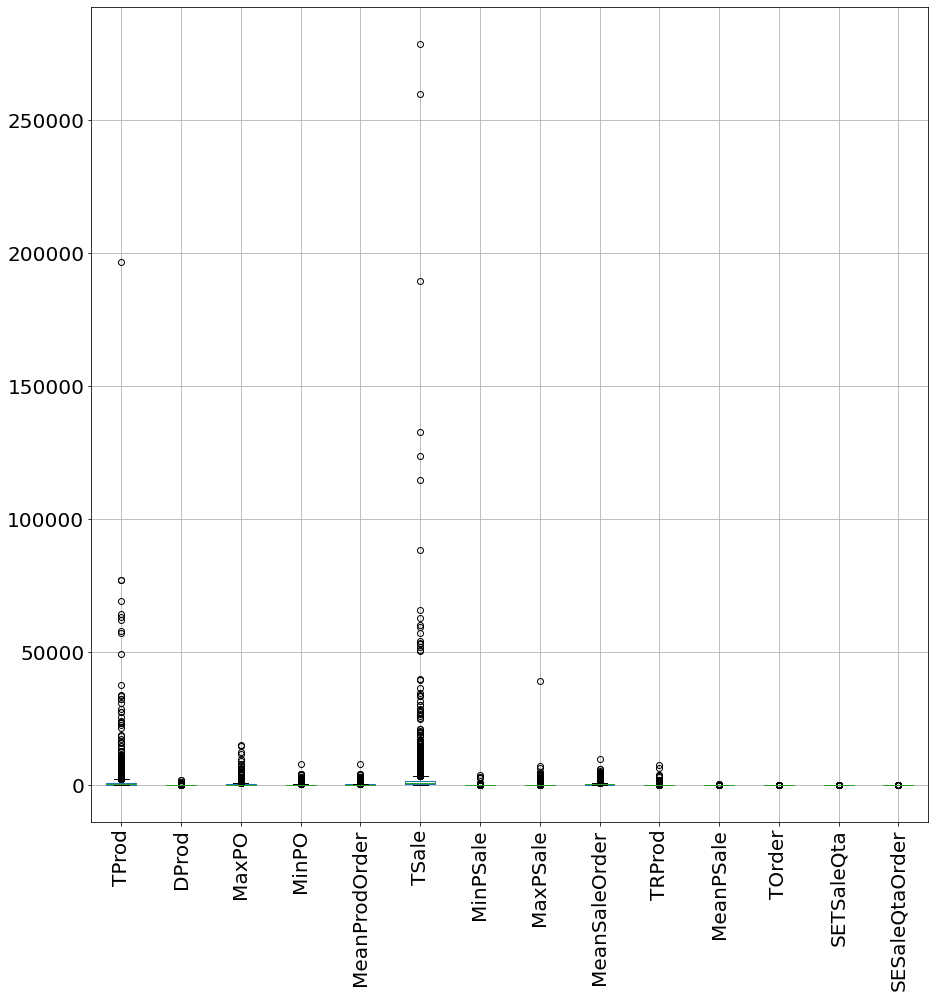

In [153]:
df.boxplot(list(df.columns), figsize=(15,15), fontsize=20, rot=90)

## Preprocessing - Normalization

In [154]:
# standard normalization: remove mean and scale to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_norm = scaler.fit_transform(df.values)
df_norm = pd.DataFrame(df_norm, columns=df.columns)

In [155]:
df_norm.describe()

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder
count,4.333000e+03,4.333000e+03,4.333000e+03,4.333000e+03,4.333000e+03,4.333000e+03,4.333000e+03,4.333000e+03,4.333000e+03,4.333000e+03,4.333000e+03,4.333000e+03,4333.000000,4.333000e+03
mean,1.311872e-17,2.623744e-17,6.559361e-18,2.623744e-17,9.511073e-17,1.311872e-17,-4.919520e-18,3.279680e-18,4.509560e-17,1.311872e-17,2.377768e-17,-5.247488e-17,0.000000,-1.311872e-16
std,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115,1.000115e+00
min,-2.407286e-01,-7.085673e-01,-5.396817e-01,-5.533243e-01,-7.324656e-01,-2.303068e-01,-1.326631e-01,-1.834449e-01,-8.294735e-01,-1.031552e-01,-3.746309e-01,-4.248859e-01,-3.038357,-1.111646e+00
25%,-2.072685e-01,-5.327342e-01,-3.641119e-01,-4.201668e-01,-4.392675e-01,-1.942810e-01,-1.243076e-01,-1.379640e-01,-4.372302e-01,-1.031552e-01,-1.481053e-01,-4.248859e-01,-0.574681,-1.111646e+00
50%,-1.618735e-01,-3.100122e-01,-2.106727e-01,-2.282635e-01,-2.219489e-01,-1.520271e-01,-8.590984e-02,-1.085039e-01,-2.175183e-01,-1.031552e-01,-7.327916e-02,-2.940380e-01,0.115489,5.428334e-02
75%,-3.378739e-02,1.823205e-01,5.637041e-02,1.163792e-01,1.334702e-01,-3.689588e-02,-3.981376e-02,-3.105737e-02,1.104937e-01,-8.864783e-02,2.434320e-02,9.850588e-02,0.704568,5.964098e-01
max,4.164962e+01,2.021558e+01,2.166178e+01,3.008463e+01,2.776420e+01,3.329601e+01,3.611463e+01,5.899233e+01,2.422774e+01,3.720007e+01,4.792569e+01,2.639894e+01,2.919606,4.683907e+00


<AxesSubplot:>

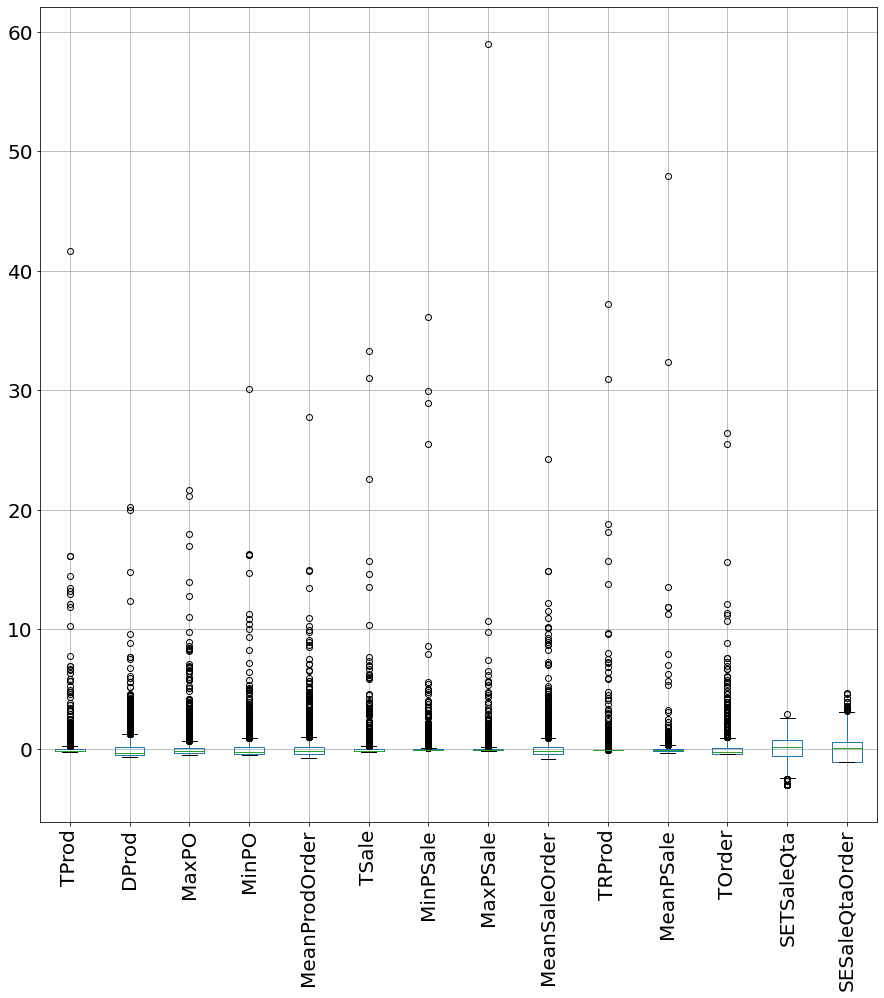

In [156]:
df_norm.boxplot(list(df_norm.keys()), figsize=(15,15), fontsize=20, rot=90)

## DBSCAN

In [157]:
# single dbscan
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.75, min_samples=5)
dbscan.fit(df_norm)
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2], dtype=int64),
 array([ 538, 3784,    6,    5], dtype=int64))

In [158]:
print(f"Number of clusters: {len(np.unique(dbscan.labels_[dbscan.labels_ >= 0], return_counts=True)[0])}")
if -1 in dbscan.labels_:
    print(f"Number of classified data points: {sum(np.unique(dbscan.labels_, return_counts=True)[1][1 : ])}")
    print(f"Number of NON-classified (noisy) data points: {np.unique(dbscan.labels_, return_counts=True)[1][0]}")

Number of clusters: 3
Number of classified data points: 3795
Number of NON-classified (noisy) data points: 538


In [159]:
from scipy.spatial.distance import pdist, squareform
dist = pdist(df_norm, 'euclidean') #pair wise distance
dist = squareform(dist) #distance matrix given the vector dist

In [160]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

In [161]:
kthd = pd.DataFrame(kth_distances)
kthd.describe()

,0
count,4333.000000
mean,0.695022
std,2.151705
min,0.095518
25%,0.252033
50%,0.371668
75%,0.592296
max,74.254202


Boxplot of distances to see their range:

<AxesSubplot:>

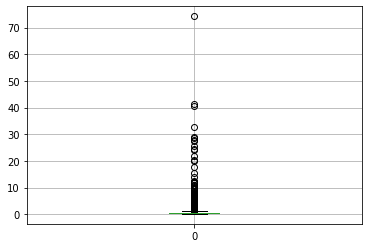

In [162]:
kthd.boxplot()

In [163]:
# free some memory
del kthd

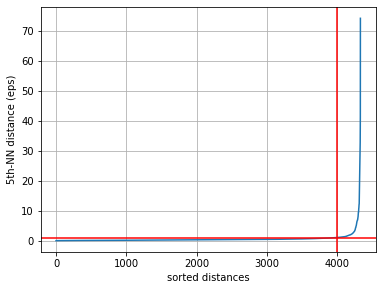

Elbow of 5th-NN distances plot: x = 4000 --> eps = 1.1510590188059187


In [164]:
plt.figure(num=1, figsize=(6,4.5))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel(f'{k}th-NN distance (eps)')
plt.xlabel('sorted distances')
plt.tick_params(axis='both', which='major')
plt.grid()
elb = 4000
plt.axvline(x=elb, color='red', linestyle='-')
plt.axhline(y=sorted(kth_distances)[elb], color='red', linestyle='-')
plt.show()
print(f"Elbow of {k}th-NN distances plot: x = {elb} --> eps = {sorted(kth_distances)[elb]}")

### Grid search for _eps_ and <i>min_samples</i>

In [165]:
from sklearn.neighbors import NearestNeighbors

# func to get metrics to evaluate the clustering done with certain eps and min_samples
def get_metrics(eps, ms, dataset, iter_):

    # Fitting
    dbscan = DBSCAN(eps=eps, min_samples=ms)
    dbscan.fit(dataset)

    # Mean Noise Point Distance metric
    noise_indices = (dbscan.labels_ == -1)  #list of booleans

    if True in noise_indices:
        nbrs = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = nbrs.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1 : ]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None

    # Number of found Clusters metric
    number_of_clusters = len(np.unique(dbscan.labels_[dbscan.labels_ >= 0]))

    # Log
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s\t%4s" % (iter_, eps, ms, str(noise_mean_distance), number_of_clusters))

    return noise_mean_distance, number_of_clusters

In [166]:
# Lists for the params to test in the grid search
gs_eps_list = [round(eps,1) for eps in np.arange(0.1, 2, 0.1)]
gs_ms_list = range(5, 20, 5)

print("Grid search parameters:")
print("eps:", gs_eps_list)
print("min_samples:", list(gs_ms_list))

Grid search parameters:
eps: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
min_samples: [5, 10, 15]


Dataframes to contain the results of the grid search

In [167]:
# Dataframe for the metric on the avg distance of the noise points from the K nearest ones
results_noise = pd.DataFrame(
    data = np.zeros((len(gs_eps_list),len(gs_ms_list))), # Empty dataframe
    columns = gs_ms_list,
    index = gs_eps_list
)

# Dataframe for the metric on the number of clusters
results_clusters = pd.DataFrame(
    data = np.zeros((len(gs_eps_list),len(gs_ms_list))), # Empty dataframe
    columns = gs_ms_list,
    index = gs_eps_list
)

Grid search cycle:

In [168]:
# Grid search cycle
i = 0

print("ITER| INFO%s |  DIST    # CLUSTERS" % (' '*39))
print("-"*73)

for eps in gs_eps_list:
    for ms in gs_ms_list:
        i += 1

        # Compute metrics
        noise_metric, clusters_metric = get_metrics(eps, ms, df_norm, i)

        # Insert results in the apposite dataframes
        results_noise.loc[eps, ms] = noise_metric
        results_clusters.loc[eps, ms] = clusters_metric


ITER| INFO                                        |  DIST    # CLUSTERS
-------------------------------------------------------------------------
  1 | Tested with eps = 0.1 and min_samples =   5 | 0.608	   6
  2 | Tested with eps = 0.1 and min_samples =  10 | 0.604	   0
  3 | Tested with eps = 0.1 and min_samples =  15 | 0.604	   0
  4 | Tested with eps = 0.2 and min_samples =   5 | 0.735	  24
  5 | Tested with eps = 0.2 and min_samples =  10 | 0.674	   8
  6 | Tested with eps = 0.2 and min_samples =  15 | 0.647	   6
  7 | Tested with eps = 0.3 and min_samples =   5 | 0.958	  17
  8 | Tested with eps = 0.3 and min_samples =  10 | 0.852	   9
  9 | Tested with eps = 0.3 and min_samples =  15 | 0.784	   9
 10 | Tested with eps = 0.4 and min_samples =   5 | 1.254	  11
 11 | Tested with eps = 0.4 and min_samples =  10 | 1.109	   7
 12 | Tested with eps = 0.4 and min_samples =  15 | 1.034	   4
 13 | Tested with eps = 0.5 and min_samples =   5 | 1.596	   9
 14 | Tested with eps = 0.5 and min